# Tushar Kumar(16csu399)
# Tanish Kumar(16csu386)
# Vardaan Lamba(16csu405)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
data = pd.read_csv("Airplane_Crashes_and_Fatalities_Since_1908.csv")

In [3]:
data.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [4]:
data.isnull().sum()

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

In [5]:
data.dropna(subset = ['Summary'], inplace = True)
#data.dropna(inplace = True)

In [6]:
data.isnull().sum()

Date               0
Time            1845
Location          13
Operator          15
Flight #        3815
Route           1346
Type              18
Registration     274
cn/In            991
Aboard            15
Fatalities         7
Ground            16
Summary            0
dtype: int64

In [7]:
year = []
for i in data.Date:
    year.append(int(i[-4:]))

In [8]:
del data['Date']

In [9]:
data.insert(loc = 0, column = 'Year', value = year)

In [10]:
data.head()

,Year,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [11]:
min(data.Year)

1908

In [12]:
max(data.Year)

2009

In [13]:
reason = []
for i in data.Summary:
    k = str(i).lower()
    if 'shot' in k or 'terrorist' in k or 'attack' in k or 'bomb' in k or 'missile' in k or 'rebel' in k or 'hijack' in k or 'hijacked' in k:
        reason.append('Attacked')
    elif 'technical' in k or 'engine' in k or 'failed' in k or 'failure' in k or 'fire' in k or 'landing' in k or 'land' in k or 'runway' in k or'control' in k or'pilot' in k or 'emergency' in k or 'fuel' in k:
        reason.append('Technical')
    elif 'fog' in k or 'altitude' in k or 'low' in k or 'mountains' in k or 'poor' in k or 'visibility' in k or 'weather' in k or 'thunder' in k or 'storm' in k or 'thunderstorm' in k or 'rain' in k or 'snowstorm' in k or 'typhoon' in k or 'air' in k or 'lightning' in k or 'turbulence' in k or 'tornado' in k:
        reason.append('Natural')
    else:
        reason.append('Other')

In [14]:
data['Reason'] = reason

In [15]:
data.head()

,Year,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Reason
0,1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",Technical
1,1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,Natural
2,1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,Natural
3,1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,Technical
4,1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,Technical


In [16]:
tech = []
nat = []
attack = []
other = []
for i in data.Reason:
    if i == 'Technical':
        tech.append(1)
    else:
        tech.append(0)
    if i == 'Natural':
        nat.append(1)
    else:
        nat.append(0)
    if i == 'Attacked':
        attack.append(1)
    else:
        attack.append(0)
    if i == 'Other':
        other.append(1)
    else:
        other.append(0)

In [17]:
data['Technical'] = tech
data['Natural'] = nat
data['Attacked'] = attack
data['Other'] = other

In [18]:
data.head()

,Year,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Reason,Technical,Natural,Attacked,Other
0,1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",Technical,1,0,0,0
1,1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,Natural,0,1,0,0
2,1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,Natural,0,1,0,0
3,1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,Technical,1,0,0,0
4,1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,Technical,1,0,0,0


In [19]:
#int(x.iloc[0]['Year'])

In [20]:
year_range = []
tech_sum = []
nat_sum = []
attack_sum = []
other_sum = []

for i in range(1908, 2010, 11):
    s = str(i) + '-' + str(i + 10)
    year_range.append(s)
    tech_sum.append(data.loc[(data['Year'] >= i) & (data['Year'] <= i + 10), 'Technical'].sum())
    nat_sum.append(data.loc[(data['Year'] >= i) & (data['Year'] <= i + 10), 'Natural'].sum())
    attack_sum.append(data.loc[(data['Year'] >= i) & (data['Year'] <= i + 10), 'Attacked'].sum())
    other_sum.append(data.loc[(data['Year'] >= i) & (data['Year'] <= i + 10), 'Other'].sum())

In [21]:
year_range

['1908-1918',
 '1919-1929',
 '1930-1940',
 '1941-1951',
 '1952-1962',
 '1963-1973',
 '1974-1984',
 '1985-1995',
 '1996-2006',
 '2007-2017']

In [22]:
tech_sum

[6, 34, 128, 294, 382, 494, 446, 551, 512, 100]

In [23]:
nat_sum

[4, 26, 66, 110, 107, 172, 154, 123, 133, 13]

In [24]:
attack_sum

[9, 0, 10, 34, 33, 52, 39, 78, 41, 6]

In [25]:
other_sum

[2, 14, 55, 127, 108, 137, 121, 91, 45, 21]

In [26]:
data1 = pd.DataFrame({'Year' : year_range, 'Technical' : tech_sum, 'Natural' : nat_sum, 'Attacked' : attack_sum, 'Other': other_sum})

In [27]:
data1

,Year,Technical,Natural,Attacked,Other
0,1908-1918,6,4,9,2
1,1919-1929,34,26,0,14
2,1930-1940,128,66,10,55
3,1941-1951,294,110,34,127
4,1952-1962,382,107,33,108
5,1963-1973,494,172,52,137
6,1974-1984,446,154,39,121
7,1985-1995,551,123,78,91
8,1996-2006,512,133,41,45
9,2007-2017,100,13,6,21


<BarContainer object of 10 artists>

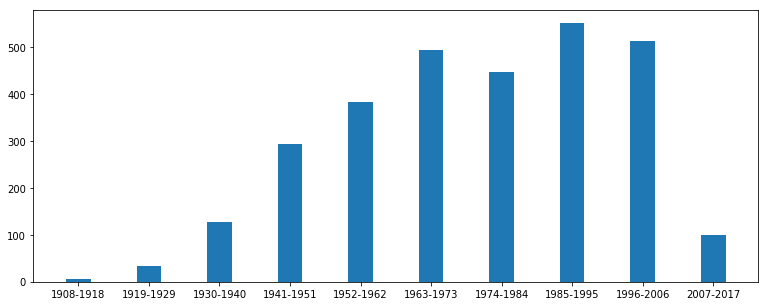

In [28]:
plt.figure(figsize=(13, 5))
plt.bar(data1['Year'], data1['Technical'], 0.35)

<BarContainer object of 10 artists>

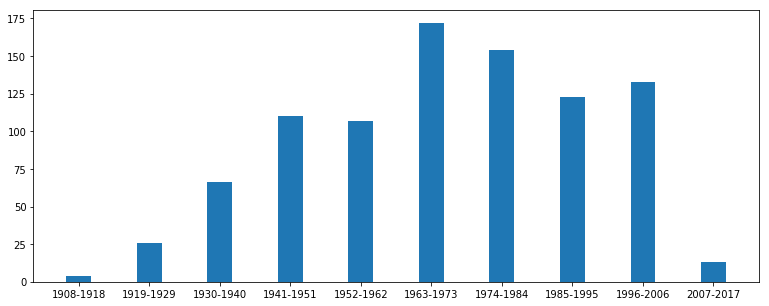

In [29]:
plt.figure(figsize=(13, 5))
plt.bar(data1['Year'], data1['Natural'], 0.35)

<BarContainer object of 10 artists>

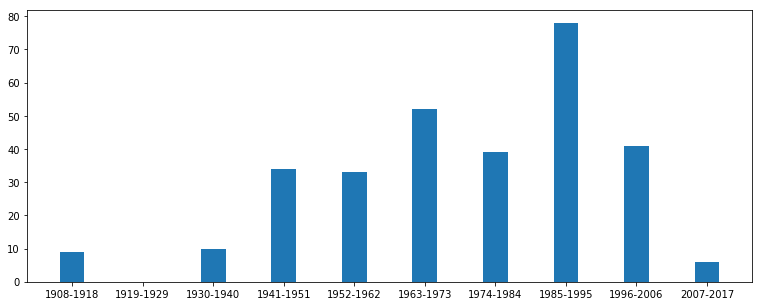

In [30]:
plt.figure(figsize=(13, 5))
plt.bar(data1['Year'], data1['Attacked'], 0.35)

<BarContainer object of 10 artists>

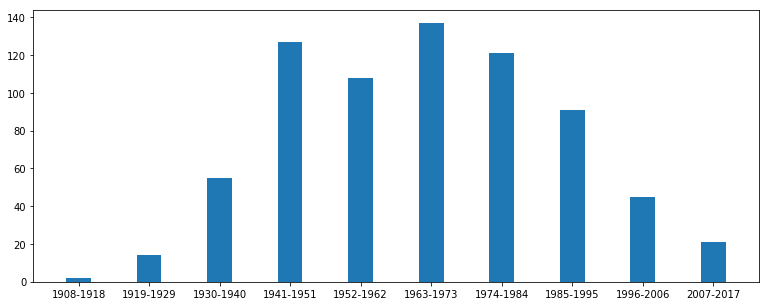

In [31]:
plt.figure(figsize=(13, 5))
plt.bar(data1['Year'], data1['Other'], 0.35)

Text(0.5,1,'Airline Crashes due to various reasons since 1908')

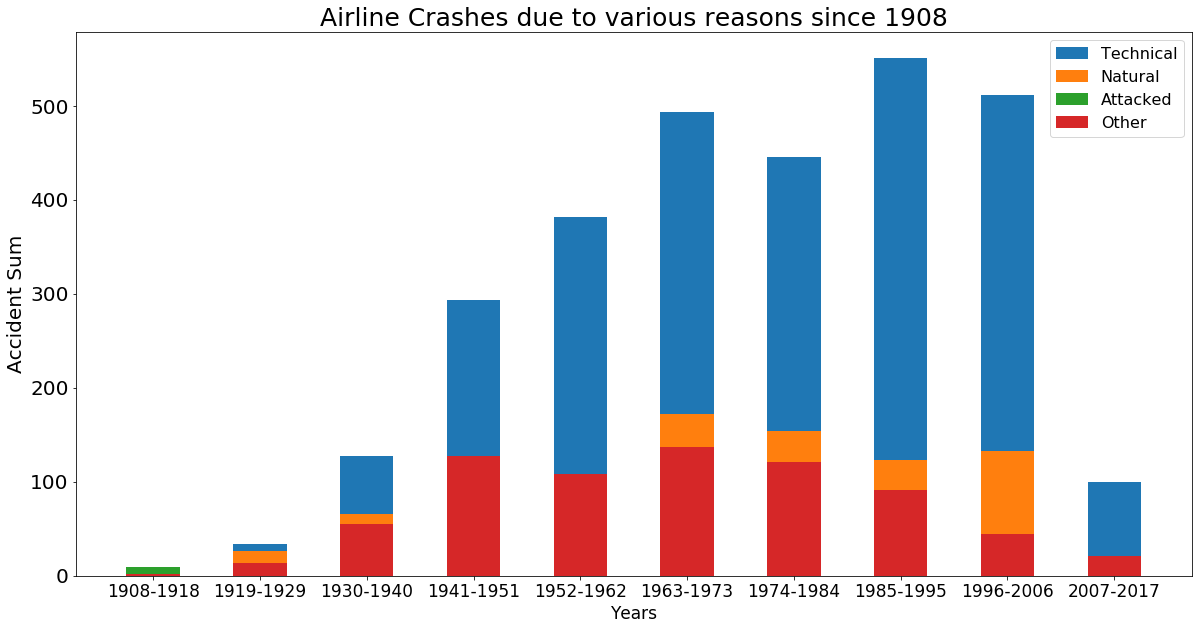

In [32]:
plt.figure(figsize=(20, 10))
p1 = plt.bar(data1['Year'], data1['Technical'], 0.5)
p2 = plt.bar(data1['Year'], data1['Natural'], 0.5)
p3 = plt.bar(data1['Year'], data1['Attacked'], 0.5)
p4 = plt.bar(data1['Year'], data1['Other'], 0.5)
plt.legend(('Technical', 'Natural', 'Attacked', 'Other'), fontsize = 16)
plt.xlabel('Years', fontsize = 17)
plt.ylabel('Accident Sum', fontsize = 20)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 17)
plt.title('Airline Crashes due to various reasons since 1908', fontsize = 25)

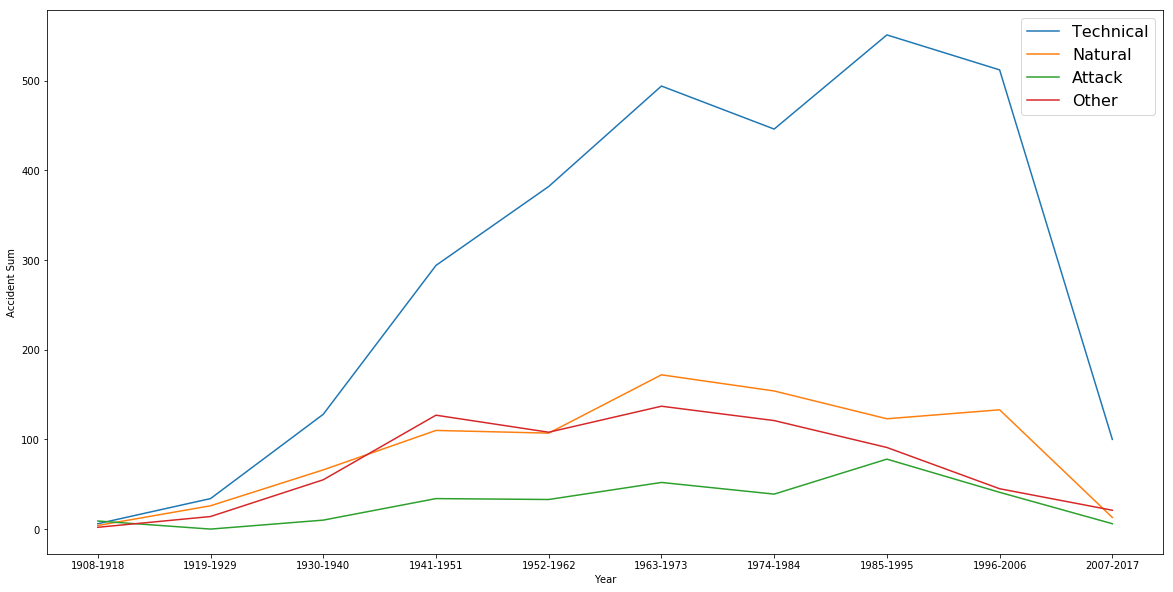

In [33]:
plt.figure(figsize=(20,10))
sns.lineplot(data1['Year'], y = data1['Technical'])
sns.lineplot(data1['Year'], y = data1['Natural'])
sns.lineplot(data1['Year'], y = data1['Attacked'])
s1 = sns.lineplot(data1['Year'], y = data1['Other'])
s1.set(xlabel='Year', ylabel='Accident Sum')
plt.legend(('Technical', 'Natural', 'Attack', 'Other'), fontsize = 16)